# Compute transition matrix 💻 

In [2]:
#function that takes in the sequences and returns transition matrix 
import numpy as np
def transition_matrix(sequence:list):
    """ Creates a matrix of transitions in human gazes


    Args:
        sequences (list): sequence of human gazes (scanpath) as a list of strings
    """
    index_dict = {'D':0,'X': 1,'G':2,'L':3,'O':4,'T':5,'S':6 }
    matrix = np.zeros(shape=(7,7)) # becuse we hve 7 classes DTLXAGO
    
    for i in range((len(sequence)-1)):
        # if sequence[i] != sequence[i+1]: 
        column = index_dict.get(sequence[i])
        row = index_dict.get(sequence[i+1])
        matrix[row,column] = matrix[row,column] + 1
            
    return matrix

In [3]:
transition_matrix('DDDDDTDX')

array([[4., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

## Compute the average transmatrix accross all images per user 🦸‍♂️ 

In [4]:
import os
import glob
path = r"C:\Users\karth\Desktop\Karthik\HCI_Lab\VisQA_new\eyetracking\csv_files\strings\Boya2\recall" # path to the recall folder of the user for which you want to compute the transition matrix 
list_of_matrix = []
for filename in glob.glob(os.path.join(path, '*.txt')):
    # print(filename)
    with open(os.path.join(os.getcwd(), filename), 'r') as f:
        string = f.readlines()
        # print(string)
        matrix = transition_matrix(string[0])
        
        list_of_matrix.append(matrix)
print(len(list_of_matrix))    
stacked_transition_matrix =np.stack(list_of_matrix) 
average_transition_matrix_user = np.average(stacked_transition_matrix, axis=0)
       

20


In [5]:
average_transition_matrix_user

array([[5.15, 0.6 , 0.  , 0.6 , 0.05, 0.4 , 0.3 ],
       [0.65, 0.75, 0.  , 0.  , 0.  , 0.  , 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.6 , 0.05, 0.  , 0.2 , 0.  , 0.05, 0.1 ],
       [0.  , 0.05, 0.  , 0.  , 0.05, 0.  , 0.  ],
       [0.15, 0.  , 0.  , 0.  , 0.  , 0.15, 0.  ],
       [0.45, 0.1 , 0.  , 0.  , 0.  , 0.05, 1.  ]])

# Compute the average transmatrix accross all images for all user for Recall 👬 

In [6]:
strings_path = r"C:\Users\karth\Desktop\Karthik\HCI_Lab\VisQA_new\eyetracking\csv_files\strings"
list_average_transition_matrix_all_user = []

for user_filename in os.listdir(strings_path):
    path = rf'C:\Users\karth\Desktop\Karthik\HCI_Lab\VisQA_new\eyetracking\csv_files\strings\{user_filename}\recall'
    list_of_matrix = []
    for filename in glob.glob(os.path.join(path, '*.txt')):
        # print(filename)
        with open(os.path.join(os.getcwd(), filename), 'r') as f:
            string = f.readlines()
            # print(string)
            matrix = transition_matrix(string[0])
            list_of_matrix.append(matrix)
    stacked_transition_matrix =np.stack(list_of_matrix) 
    average_transition_matrix_user = np.average(stacked_transition_matrix, axis=0)
    #print(average_transition_matrix_user)
    list_average_transition_matrix_all_user.append(average_transition_matrix_user)
stacked_average_transition_matrix_all_user =np.stack(list_average_transition_matrix_all_user)
average_transition_matrix_all_user = np.average(stacked_average_transition_matrix_all_user, axis=0)

# Plot the transition matrix 📊 

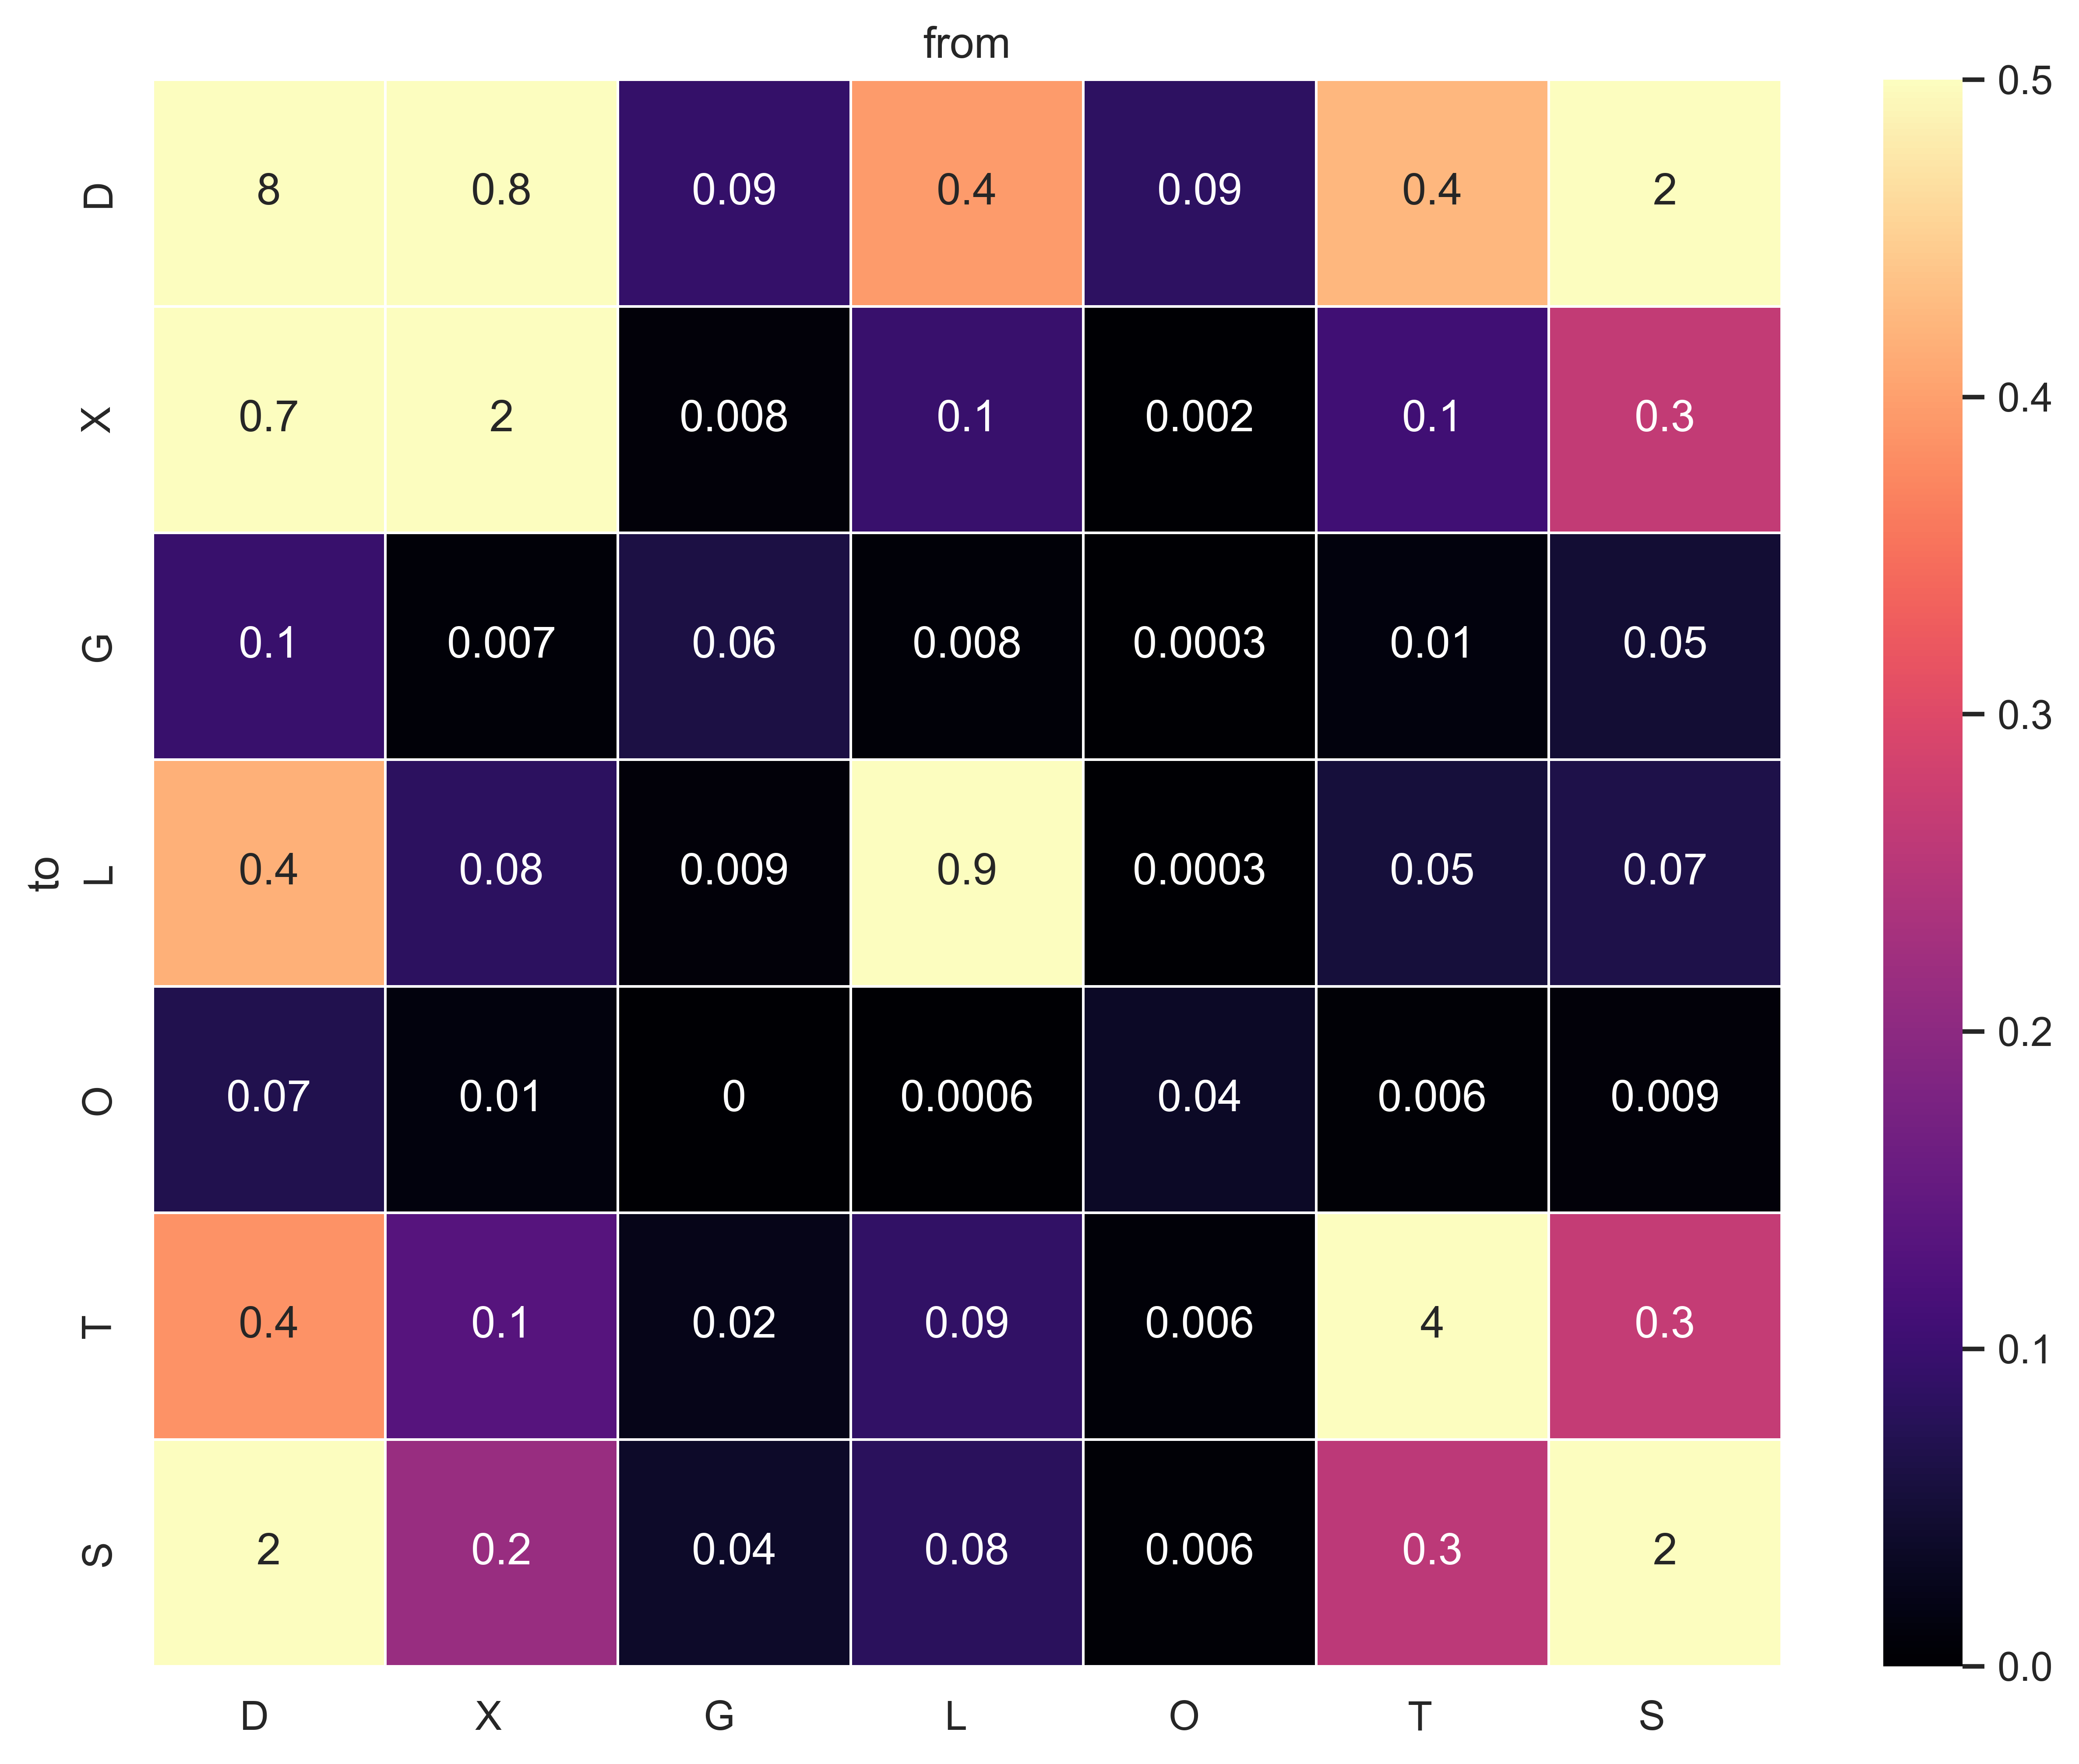

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
trans_matrix = average_transition_matrix_all_user

transpd = pd.DataFrame({
    'D':trans_matrix[0],
    'X':trans_matrix[1],
    'G':trans_matrix[2],
    'L':trans_matrix[3],
    'O':trans_matrix[4],
    'T':trans_matrix[5],
    'S':trans_matrix[6]
})

transpd.index = ['D','X','G','L','O','T','S']

sns.set_theme(style="white")
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8), dpi=600)
sns.heatmap(transpd, annot=True, linewidths=.5, ax=ax, cmap='magma', vmin=0, vmax=.5,fmt='.1g') #magma
plt.setp(ax.get_xticklabels(), horizontalalignment='right')

ax.set_title('from')
ax.set_ylabel('to')

f.savefig('transmatrix_recall.png')

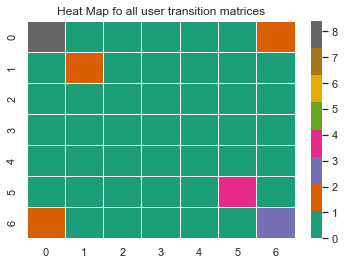

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define Data Coordinates
sns.heatmap( average_transition_matrix_all_user , linewidth = 0.5 , cmap = 'Dark2' )

# Add Title



plt.title( "Heat Map fo all user transition matrices" )

# Display

plt.show()

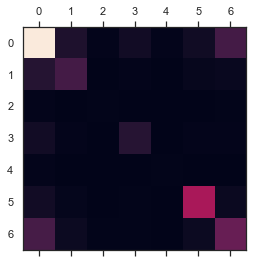

In [27]:
# Display matrix

plt.matshow(average_transition_matrix_all_user)

# Display

plt.show()

In [28]:
# list of uniq eleement labels
l = ['text (header row)', 'data (area)', 'text (title)', 'axis (time)',
       'data (bars)', 'axis', 'text (axis Label)', 'text (paragraph)',
       'data', 'data (text)', 'data (point)', 'text (label)',
       'data (table)', 'data (circle)', 'data (distribution)',
       'text (source)', 'data (map)', 'Legend', 'annotation', 'legend',
       'graphical element', 'object (photograph)', 'annotation (arrow)',
       'object (pictogram)']

## Compute and plot Transition matrix for all users in recognition stage 💻 📊 

In [29]:
strings_path = r"C:\Users\karth\Desktop\Karthik\HCI_Lab\VisQA_new\eyetracking\csv_files\strings"
list_average_transition_matrix_all_user = []

for user_filename in os.listdir(strings_path):
    path = rf'C:\Users\karth\Desktop\Karthik\HCI_Lab\VisQA_new\eyetracking\csv_files\strings\{user_filename}\recognition'
    list_of_matrix = []
    if os.path.exists(path):
        for filename in glob.glob(os.path.join(path, '*.txt')):
            # print(filename)
            with open(os.path.join(os.getcwd(), filename), 'r') as f:
                string = f.readlines()
                # print(string)
                matrix = transition_matrix(string[0])
                list_of_matrix.append(matrix)
        stacked_transition_matrix =np.stack(list_of_matrix) 
        average_transition_matrix_user = np.average(stacked_transition_matrix, axis=0)
        #print(average_transition_matrix_user)
        list_average_transition_matrix_all_user.append(average_transition_matrix_user)
stacked_average_transition_matrix_all_user =np.stack(list_average_transition_matrix_all_user)
average_transition_matrix_all_user_recognition = np.average(stacked_average_transition_matrix_all_user, axis=0)

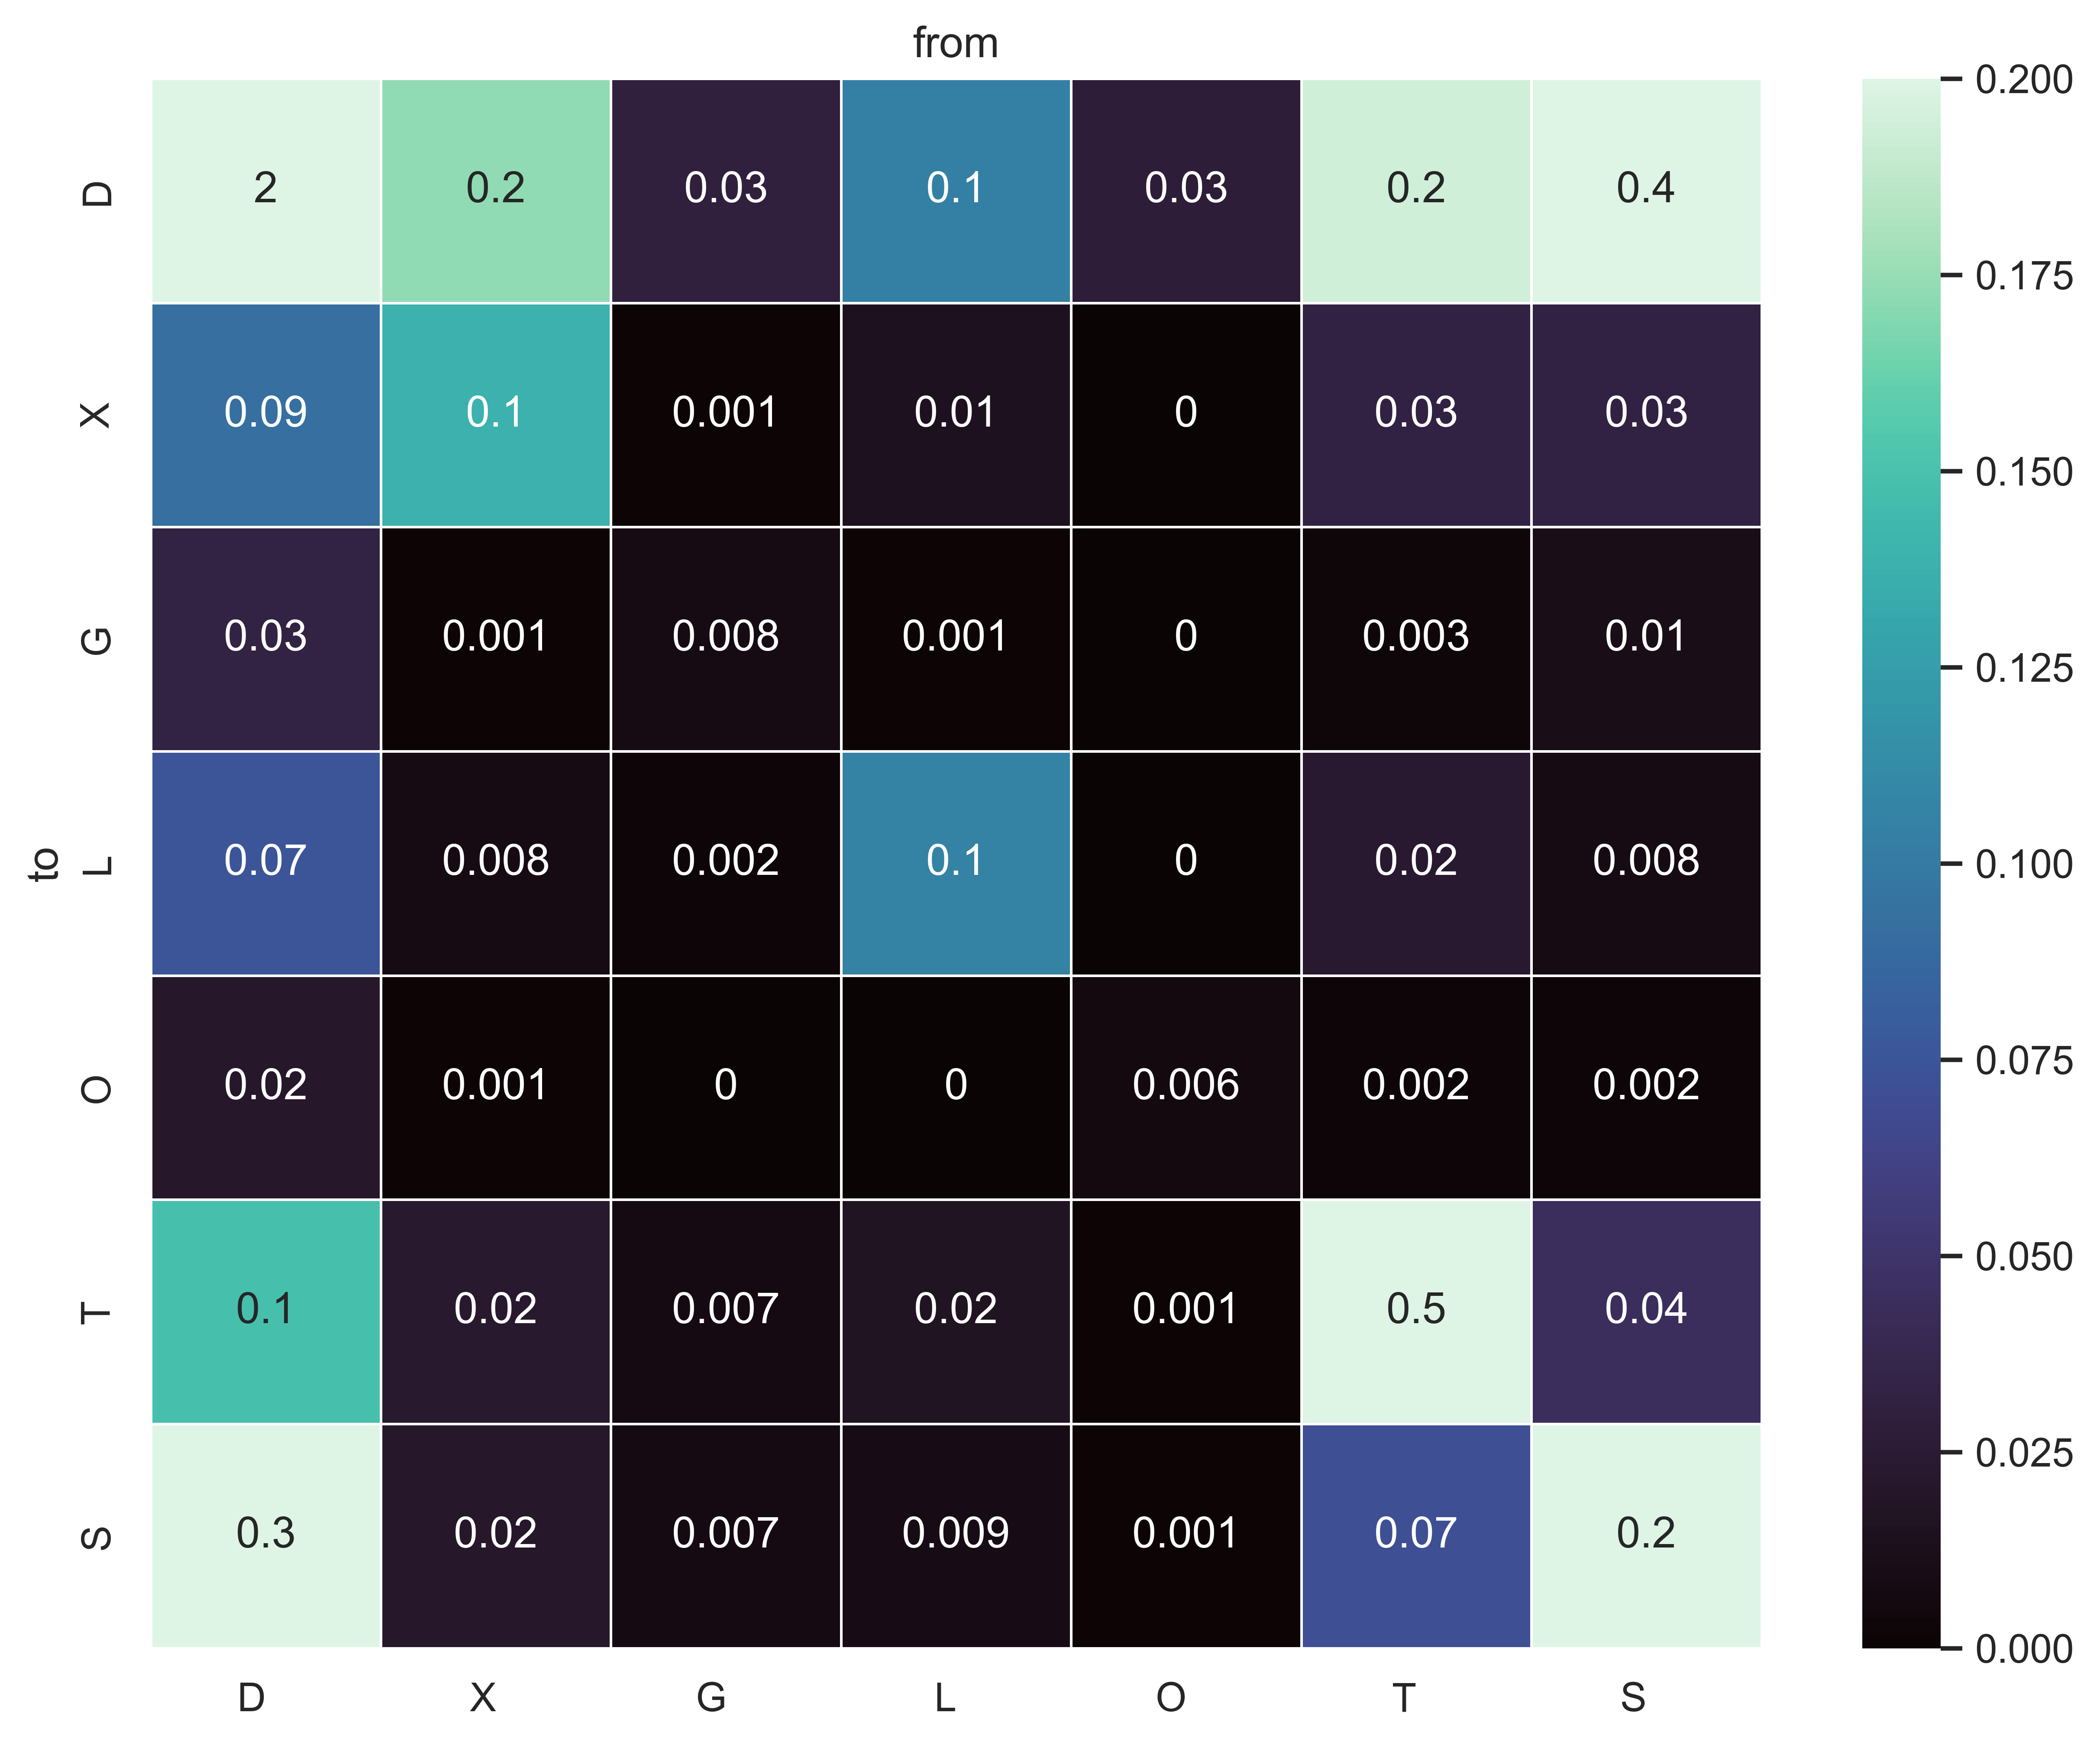

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
trans_matrix = average_transition_matrix_all_user_recognition

transpd = pd.DataFrame({
    'D':trans_matrix[0],
    'X':trans_matrix[1],
    'G':trans_matrix[2],
    'L':trans_matrix[3],
    'O':trans_matrix[4],
    'T':trans_matrix[5],
    'S':trans_matrix[6]
})

transpd.index = ['D','X','G','L','O','T','S']
sns.set_theme(style="white")
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8), dpi=600)
sns.heatmap(transpd, annot=True, linewidths=.5, ax=ax, cmap='mako', vmin=0, vmax=.2,fmt='.1g') #magma
plt.setp(ax.get_xticklabels(), horizontalalignment='right')

ax.set_title('from')
ax.set_ylabel('to')

f.savefig('transmatrix_recognition.png')